In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import os
from tqdm import tqdm
from matplotlib_venn import venn2,venn3,venn2_circles
import string
from matplotlib.lines import Line2D

In [2]:
def peptide_type(x):
    if x.startswith('DECOY-'):
        return 'DECOY_null'
    elif x.startswith('TRAP-'):
        return 'TRAP'
    else:
        return 'SAMPLE'

In [3]:
dirname="../result/"

16590
20082


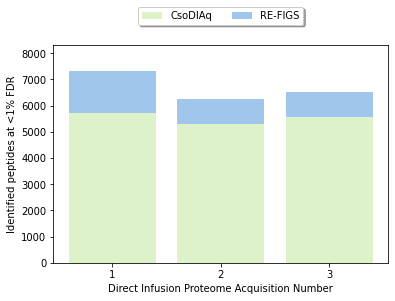

In [4]:
csodiaqfile=[
"CsoDIAq-file4_480_20210929_Hela_1ug_noRT_FAIMS_30to80_60ms_45min_350nL-1_corrected_peptideFDR.csv",
"CsoDIAq-file5_480_20210929_Hela_1ug_noRT_FAIMS_30to80_60ms_45min_350nL-2_corrected_peptideFDR.csv",
"CsoDIAq-file6_480_20210929_Hela_1ug_noRT_FAIMS_30to80_60ms_45min_350nL-3_corrected_peptideFDR.csv"]
REFIGSfile=[
"CsoDIAq-file4_480_20210929_Hela_1ug_noRT_FAIMS_30to80_60ms_45min_350nL-1_correctedNoFilter_withFeature_4cycle_7_7_LDA_ID.csv",
"CsoDIAq-file5_480_20210929_Hela_1ug_noRT_FAIMS_30to80_60ms_45min_350nL-2_correctedNoFilter_withFeature_4cycle_7_7_LDA_ID.csv",
"CsoDIAq-file6_480_20210929_Hela_1ug_noRT_FAIMS_30to80_60ms_45min_350nL-3_correctedNoFilter_withFeature_4cycle_7_7_LDA_ID.csv"]
sample1 = []
sample2 = []
num1=[]
num2=[]
samplelist1=[]
samplelist2=[]
for filename in csodiaqfile:
    csodiaq_id_df = pd.read_csv(os.path.join(dirname,filename))
    csodiaq_id_df['protein'] = csodiaq_id_df['peptide'].apply(peptide_type)
    sample = csodiaq_id_df[csodiaq_id_df['protein']=='SAMPLE']
    num1.append(len(sample))
    sample1.extend(sample['peptide'])
    samplelist1.append(sample['peptide'])
print(len(sample1))
for filename in REFIGSfile:
    csodiaq_id_df = pd.read_csv(os.path.join(dirname,filename))
    csodiaq_id_df['protein'] = csodiaq_id_df['peptide'].apply(peptide_type)
    sample = csodiaq_id_df[csodiaq_id_df['protein']=='SAMPLE']
    num2.append(len(sample))
    sample2.extend(sample['peptide'])
    samplelist2.append(sample['peptide'])
print(len(sample2))

plt.bar([1,2,3],num1,label='CsoDIAq',color='#DDF2C9')
plt.bar([1,2,3],np.array(num2)-np.array(num1),bottom=num1,label='RE-FIGS',color = '#A1C6EC')
new_ticks = np.linspace(1,3,3)
plt.xticks(new_ticks)
plt.ylim(0,8300)
plt.xlabel('Direct Infusion Proteome Acquisition Number')
plt.ylabel('Identified peptides at <1% FDR')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),fancybox=True, shadow=True, ncol=2)
plt.show()

In [5]:
np.mean(num1)

5530.0

In [6]:
np.mean(num2)

6694.0

In [7]:
np.mean(num2)/np.mean(num1)

1.210488245931284

In [8]:
dict1=dict()
dict2=dict()
for sample in sample1:
    dict1[sample] = 0
for sample in sample2:
    dict2[sample] = 0
for i in range(3):
    for sample in samplelist1[i]:
        dict1[sample] = dict1[sample] + 1
    for sample in samplelist2[i]:
        dict2[sample] = dict2[sample] + 1
goodkey1=[]
goodkey2=[]
for key in dict1.keys():
    if dict1[key]>=3:
        goodkey1.append(key)
for key in dict2.keys():
    if dict2[key]>=3:
        goodkey2.append(key)

In [9]:
len(goodkey1)

4311

In [10]:
len(goodkey2)

4555

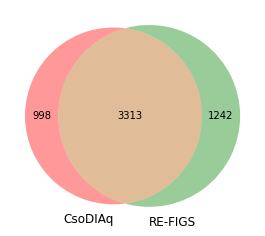

In [11]:
venn2([set(goodkey1),set(goodkey2)],['CsoDIAq','RE-FIGS'])

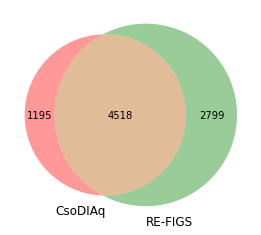

In [12]:
venn2([set(samplelist1[0]),set(samplelist2[0])],['CsoDIAq','RE-FIGS'])

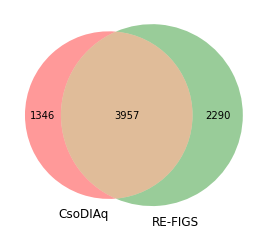

In [13]:
venn2([set(samplelist1[1]),set(samplelist2[1])],['CsoDIAq','RE-FIGS'])

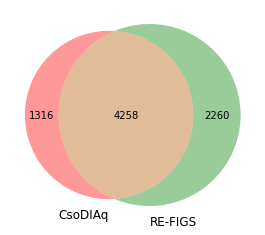

In [14]:
venn2([set(samplelist1[2]),set(samplelist2[2])],['CsoDIAq','RE-FIGS'])

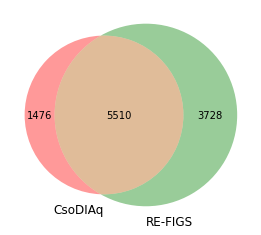

In [15]:
venn2([set(sample1),set(sample2)],['CsoDIAq','RE-FIGS'])

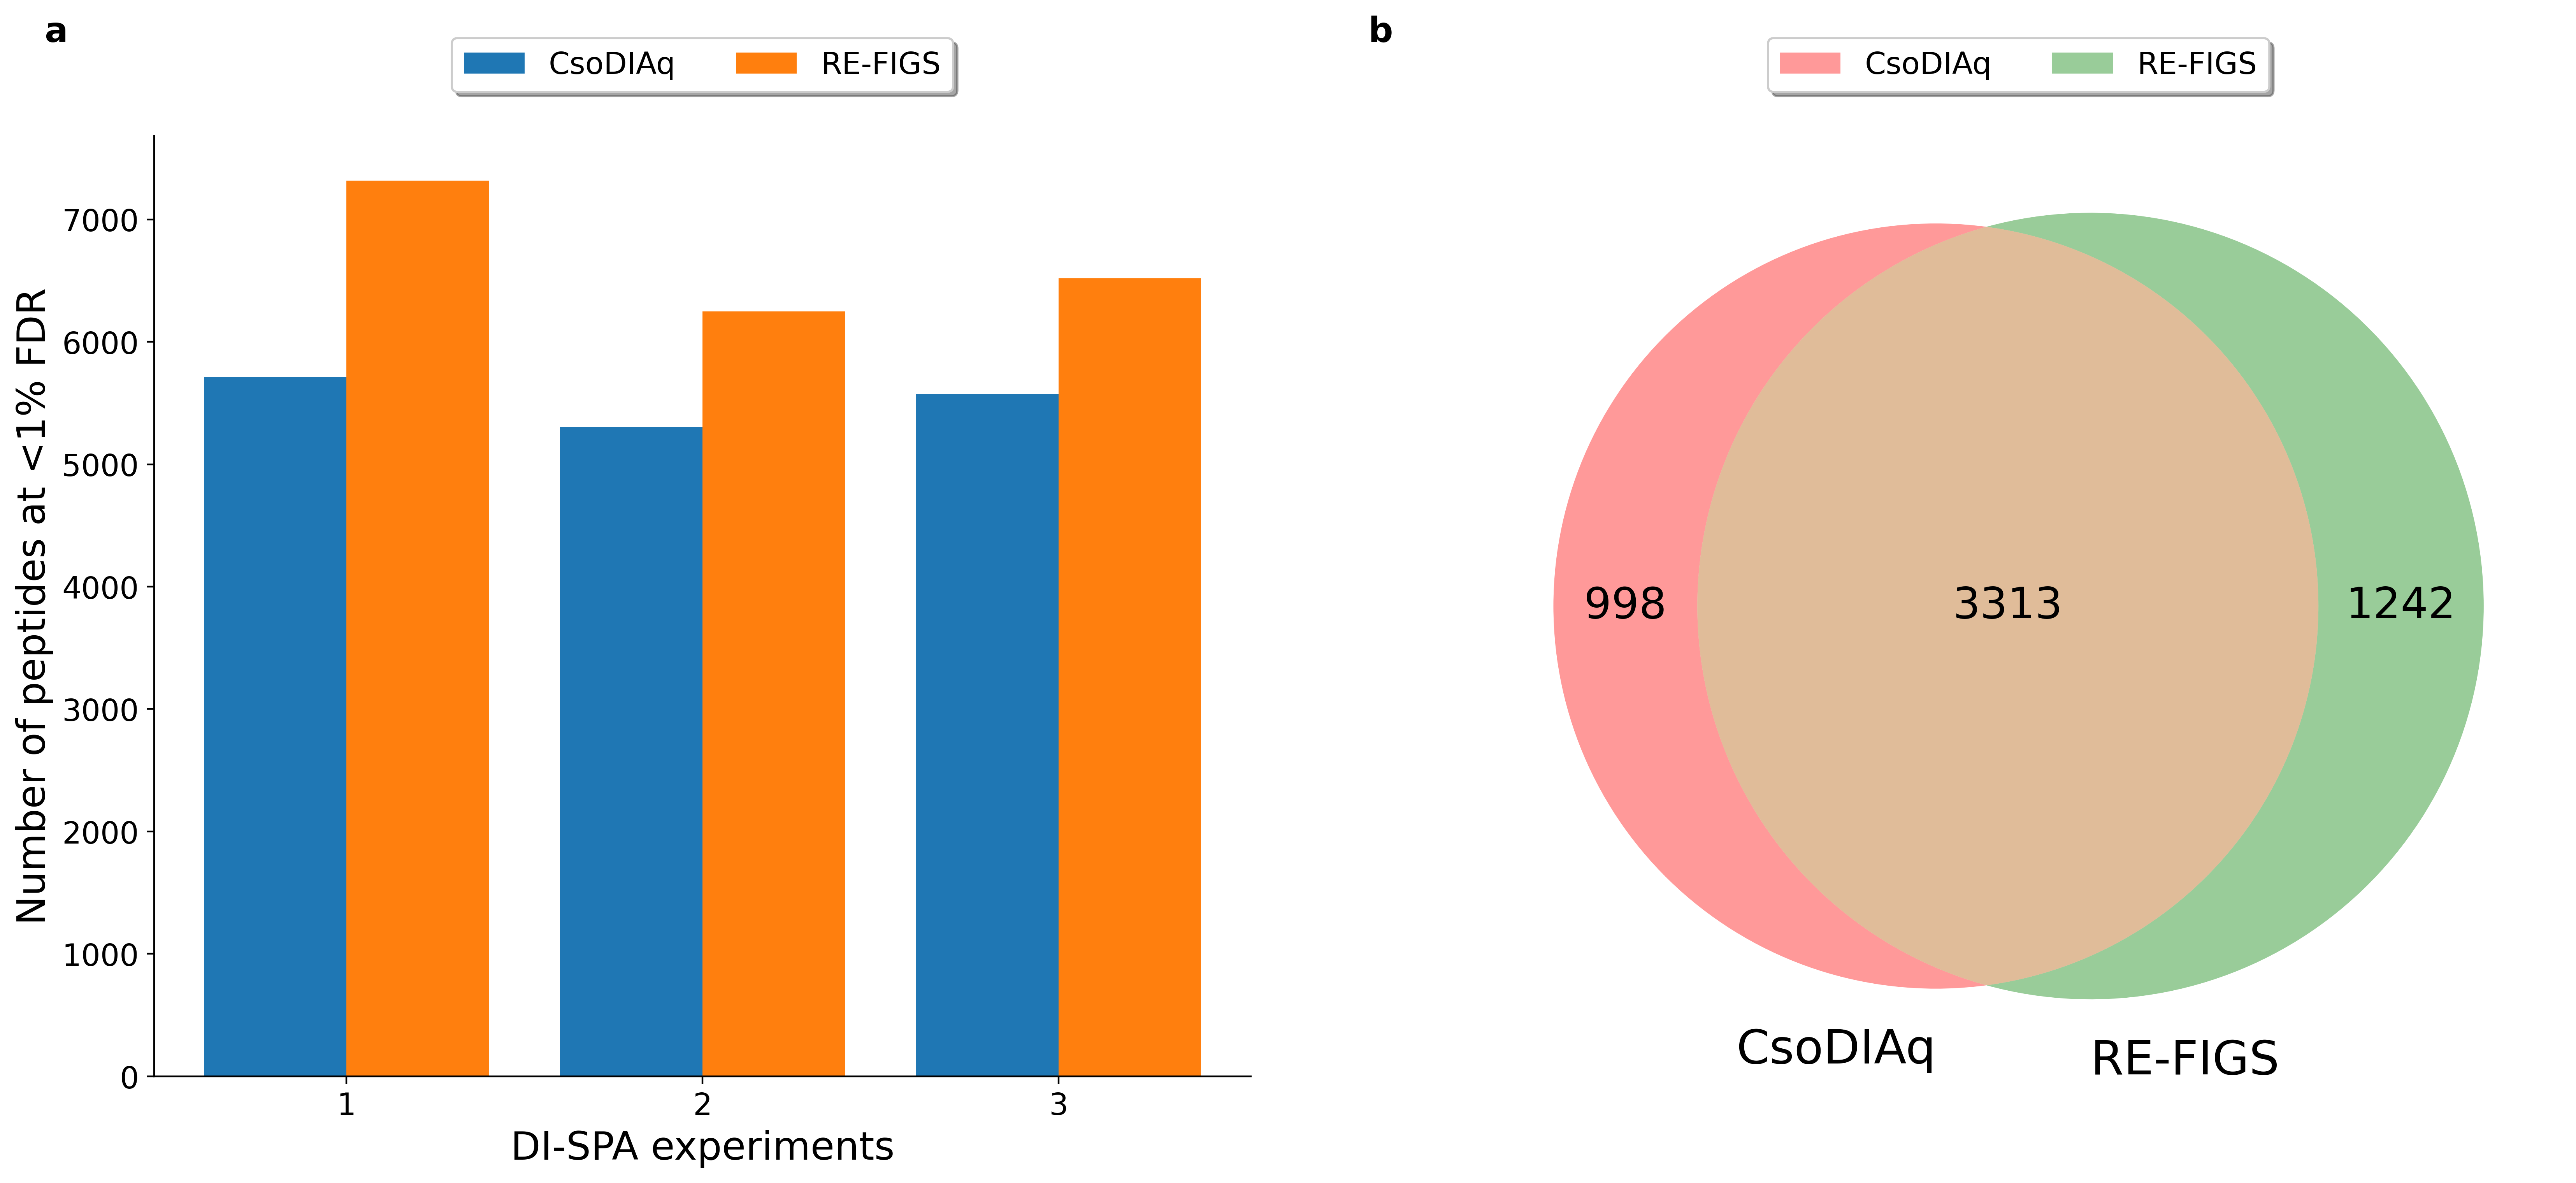

In [16]:
fig, axs = plt.subplots(1,2,figsize=(20,8),dpi=400)
xarange=np.arange(1,len(num1)+1,1)
mywidth = 0.4
axs[0].bar(xarange-0.2,num1,label='CsoDIAq',width=mywidth)
# axs[0].bar(range(1,len(num1)+1), np.array(num2)-np.array(num1), bottom=num1,label='RE-FIGS',color='#A1C6EC',alpha=1)
axs[0].bar(xarange+0.2, np.array(num2),label='RE-FIGS',width=mywidth)
axs[0].set_xlabel('DI-SPA experiments',fontsize=18)
axs[0].set_ylabel('Number of peptides at <1% FDR',fontsize=18)
axs[0].tick_params(labelsize=14)
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
new_ticks = np.linspace(1,3,3)
axs[0].set_xticks(new_ticks)
custom_lines = [
    Line2D([0], [0], color='#DDF2C9', lw=4),
    Line2D([0], [0], color='#A1C6EC', lw=4),
]
axs[0].legend(['CsoDIAq', 'RE-FIGS'],loc='upper center', bbox_to_anchor=(0.5, 1.12),fancybox=True, shadow=True,ncol=2,fontsize=14)

# plt.legend()
# v = venn2(subsets = [set(goodkey1),set(goodkey2)],set_labels = ['',''],ax=axs[1],set_colors=('#DDF2C9','#A1C6EC'),alpha = 1)
# for t in v.subset_labels:
#     t.set_fontsize(20)
# v.get_patch_by_id('11').set_color('#F3E2A9')
# c = venn2_circles(subsets = [set(goodkey1),set(goodkey2)],linestyle='dashed')
# c[0].set_lw(2.0)
# c[1].set_lw(2.0)
# axs[1].legend(custom_lines, ['CsoDIAq', 'RE-FIGS'],loc='upper center', bbox_to_anchor=(0.5, 1.12),fancybox=True, shadow=True,ncol=2,fontsize=14)


v3=venn2([set(goodkey1),set(goodkey2)],['CsoDIAq','RE-FIGS'],ax = axs[1])      
for t in v3.set_labels:
    t.set_fontsize(22)
for t in v3.subset_labels:
    t.set_fontsize(20)
axs[1].legend(['CsoDIAq', 'RE-FIGS'],loc='upper center', bbox_to_anchor=(0.5, 1.12),fancybox=True, shadow=True,ncol=2,fontsize=14)



axs = axs.flat
for n, ax in enumerate(axs):
    # ax.imshow(np.random.randn(10,10), interpolation='none')    
    ax.text(-0.1, 1.1, string.ascii_lowercase[n], transform=ax.transAxes, 
            size=16, weight='bold')
plt.savefig('fig5.jpg')   